<a href="https://colab.research.google.com/github/NarendarB0152/ProjectNo4/blob/main/ProjectNo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
device="/device:CPU:0"

In [3]:
import zipfile
z=zipfile.ZipFile('/content/Trash-Classifier-in-Python-using-Tensorflow.zip')
z.extractall()

In [5]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math
dir_example="Trash-Classifier-in-Python-using-Tensorflow/Data"
classes=os.listdir(dir_example)
print(classes)

['Train', 'Test']


In [6]:
dir_example="Trash-Classifier-in-Python-using-Tensorflow/Data/Train"
train_classes=os.listdir(dir_example)
print(train_classes)

['plastic', 'trash', 'cardboard', 'metal', 'paper', 'glass']


In [7]:
dir_example="Trash-Classifier-in-Python-using-Tensorflow/Data/Test"
test_classes=os.listdir(dir_example)
print(test_classes)

['plastic', 'trash', 'cardboard', 'metal', 'paper', 'glass']


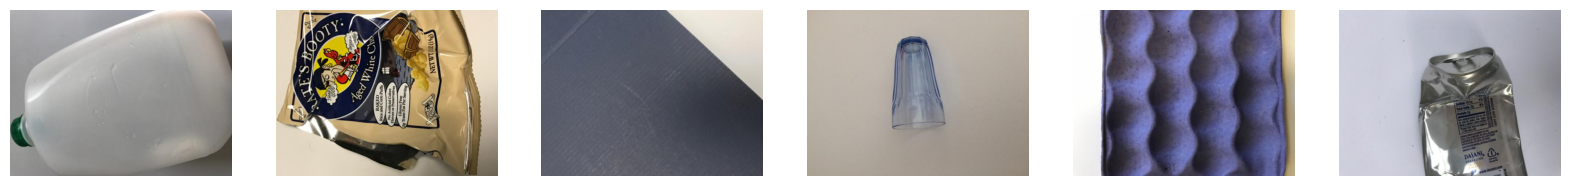

In [12]:
dir_with_examples="Trash-Classifier-in-Python-using-Tensorflow/visualize"
files_per_row=6
files_in_dir=os.listdir(dir_with_examples)
number_of_cols=files_per_row
number_of_rows=int(len(files_in_dir)/number_of_cols)
# print(number_of_rows)
fig,axs=plt.subplots(number_of_rows,number_of_cols)
fig.set_size_inches(20,15,forward=True)

try:
  for i in range(0,len(files_in_dir)):
    file_name=files_in_dir[i]
    image=Image.open(f'{dir_with_examples}/{file_name}')
    row=math.floor(i/files_per_row)
    col=i%files_per_row
    axs[col].imshow(image)
    axs[col].axis('off')
except:
  pass
plt.show()


In [13]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train='Trash-Classifier-in-Python-using-Tensorflow/Data/Train'
test='Trash-Classifier-in-Python-using-Tensorflow/Data/Test'

In [17]:
train_generator=ImageDataGenerator(rescale=1/255)
train_generator=train_generator.flow_from_directory(train,
                                                    target_size=(300,300),
                                                    batch_size=32,
                                                    class_mode='sparse')
labels=(train_generator.class_indices)
print(labels,'\n')

labels=dict((v,k) for k,v in labels.items())
print(labels)

Found 2186 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}
